<a href="https://colab.research.google.com/github/stories2/Kangnam_ML/blob/main/HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mglearn

     |████████████████████████████████| 540 kB 26.0 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=44e9cccc5567f25ec417e7dbb4630be839577b7f91143e2eb14b34471fc78f30
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [2]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import mglearn
%matplotlib inline

In [3]:
x, y = mglearn.datasets.make_wave(n_samples=50)

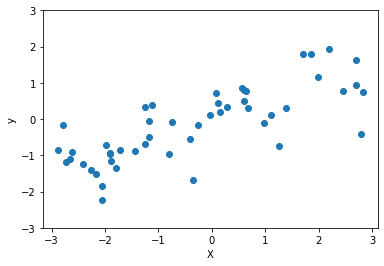

In [4]:
plt.plot(x, y, 'o')
plt.xlabel('X')
plt.ylabel('y')
plt.ylim(-3, 3)
plt.show()

In [5]:
train_input, test_input, train_target, test_target = train_test_split(x, y, train_size=0.7)

In [6]:
train_input[:2], train_target[:2]

(array([[0.12040813],
        [2.70428584]]), array([0.45619291, 0.94576536]))

In [7]:
knr = KNeighborsRegressor(n_jobs=3)
knr.fit(train_input, train_target)

KNeighborsRegressor(n_jobs=3)

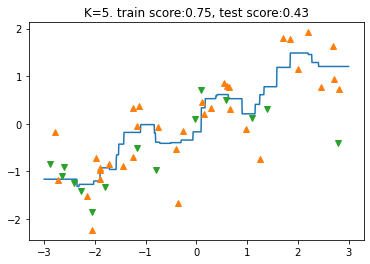

In [8]:
xs = np.linspace(-3, 3, 1000)
plt.plot(xs, knr.predict(xs.reshape(-1,1)))
plt.plot(train_input,train_target, '^')
plt.plot(test_input, test_target, 'v')
plt.title("K={}. train score:{:.2f}, test score:{:.2f}".format(
     knr.n_neighbors, knr.score(train_input, train_target), knr.score(test_input, test_target)))
plt.show()

In [9]:
knr.predict(train_input[:10]), train_target[:10]

(array([ 0.33558854,  1.2045889 ,  0.2087336 ,  0.52765482,  0.6114277 ,
         0.61423832,  1.48788451, -0.4275697 , -1.20261711,  1.18543232]),
 array([ 0.45619291,  0.94576536, -0.10738882,  0.31665581, -0.73764268,
         0.8028996 ,  1.92430207, -0.89087302, -0.96789094,  1.7858337 ]))

In [10]:
# k 가 왜 높게 나왔을까

In [12]:
xs = np.linspace(-3, 3, 1000)
xs_reshaped = xs.reshape(-1,1)

In [47]:
def neighborRegression(n, train_input, train_target, test_input, test_target, wave):
  knr = KNeighborsRegressor(n_jobs=3, n_neighbors=n)
  knr.fit(train_input, train_target)
  return (n, knr.score(train_input, train_target), knr.score(test_input, test_target), knr.predict(wave))

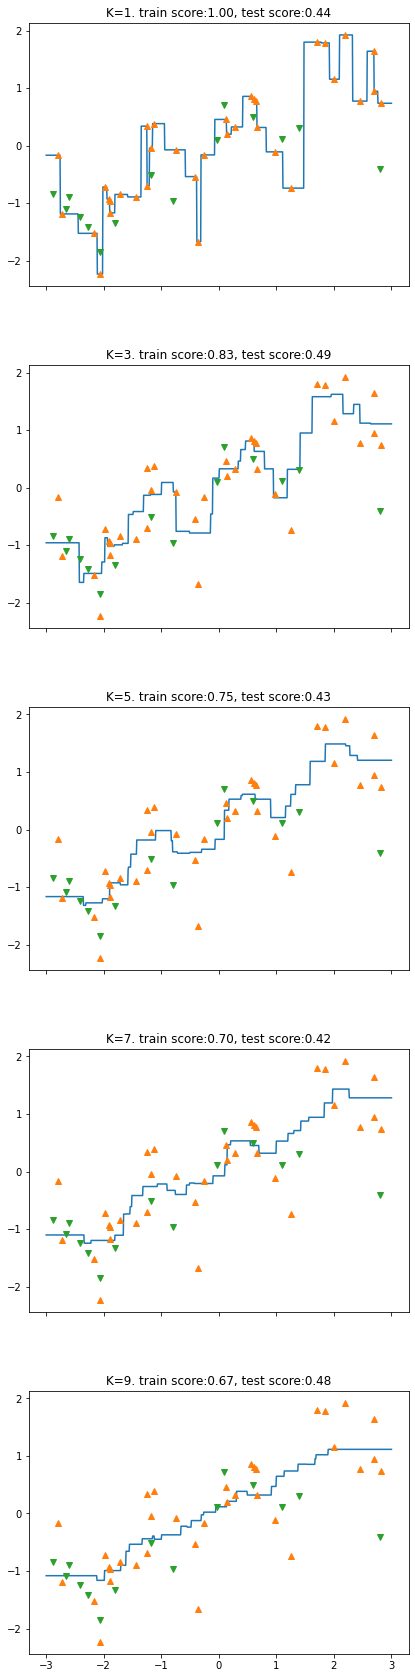

In [49]:
f, axes = plt.subplots(ncols=1, nrows=5, sharex=True, sharey=True)
f.set_size_inches((30, 30))

n_neighbor_cnt = 0

for ax in axes:
  n_neighbor = n_neighbor_cnt * 2 + 1
  _, train_score, test_score, wave_predict = neighborRegression(n_neighbor, train_input, train_target, test_input, test_target, xs_reshaped)
  # ax.plot([1, 2, 3], [1, 2, 3])
  ax.plot(xs, wave_predict)
  ax.plot(train_input,train_target, '^')
  ax.plot(test_input, test_target, 'v')
  ax.set_title("K={}. train score:{:.2f}, test score:{:.2f}".format(n_neighbor, train_score, test_score))
  ax.set(adjustable='box', aspect='equal')

  n_neighbor_cnt += 1
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)
plt.show()